<a href="https://colab.research.google.com/github/winengewe/coffee-shop-revenue-prediction/blob/main/coffee_shop_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3 - Coffee Shop
1.We are going to see what effects the shop revenue.

2.Load dataset

3.Use describe and info to look at data

4.Check for missing data and drop if required

5.Check for correlations

6.Set x as 'Number_of_Customers_Per_Day' and y  as 'Daily_Revenue'

7.Plot this as a scatter chart

8.Split data into an 70/30 split for train/test

9.Create a Linear model using training data

10.Using test data generate y_predict

11.Score the Model

12.Plot the x_test & y_test on same chart as x_test, y_predict

13.Would you recommend this model to help coffee shop so they could use it for promotions to increase Customers ?

In [ ]:
# 1.We are going to see what effects the shop revenue.
# import libraries
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 2.Load dataset
df = pd.read_csv('gdrive/My Drive/GC NPA AI 2025/coffee_shop_revenue.csv')
# 3.Use describe and info to look at data
print(df.head()) # look at data
print(df.info())
print(df.describe())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

In [ ]:
# 4.Check for missing data and drop if required
print(df.isnull().sum()) # check for missing data
df.dropna(inplace=True) # drop missing data

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


In [ ]:
# 5.Check for correlations
df.corr(numeric_only=True)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
Number_of_Customers_Per_Day,1.000000,-0.014647,0.000122,0.000346,0.027184,-0.000880,0.736461
Average_Order_Value,-0.014647,1.000000,-0.017125,0.011484,0.018782,0.018151,0.535694
Operating_Hours_Per_Day,0.000122,-0.017125,1.000000,-0.030451,0.019247,0.014422,-0.005323
Number_of_Employees,0.000346,0.011484,-0.030451,1.000000,0.026535,-0.041881,0.003295
Marketing_Spend_Per_Day,0.027184,0.018782,0.019247,0.026535,1.000000,-0.012562,0.254812
Location_Foot_Traffic,-0.000880,0.018151,0.014422,-0.041881,-0.012562,1.000000,0.013469
Daily_Revenue,0.736461,0.535694,-0.005323,0.003295,0.254812,0.013469,1.000000


In [ ]:
# 6.Set x as 'Number_of_Customers_Per_Day' and y as 'Daily_Revenue'
x=df[['Number_of_Customers_Per_Day']].to_numpy()
y=df[['Daily_Revenue']].to_numpy()

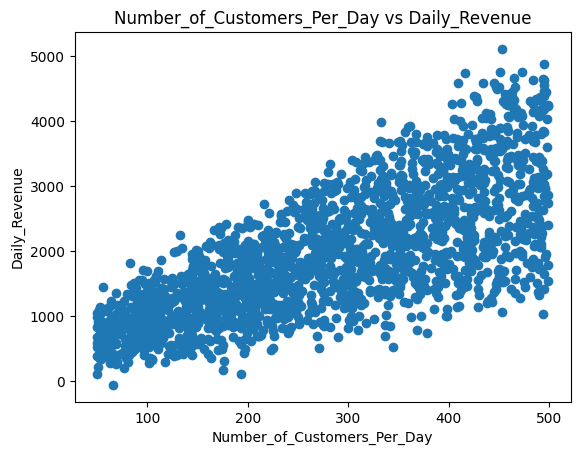

In [ ]:
# 7.Plot this as a scatter chart
plt.title("Number_of_Customers_Per_Day vs Daily_Revenue")
plt.xlabel("Number_of_Customers_Per_Day")
plt.ylabel("Daily_Revenue")
plt.scatter(x,y)

In [ ]:
# 8.Split data into an 70/30 split for train/test
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# 8.Split data into an 70/30 split for train/test
split=int(0.7*len(df)) # find a 80% value so we can use to split data nto Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

In [ ]:
# 9.Create a Linear model using training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 10.Using test data generate y_predict
y_pred = model.predict(x_test)

In [ ]:
# 11.Score the Model
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.5466968457582733
0.5320935876634649


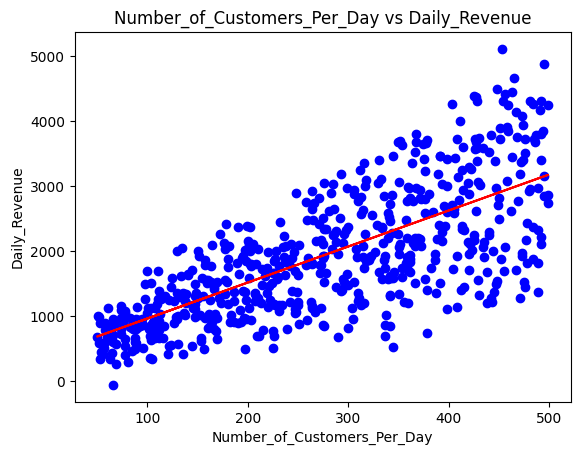

In [ ]:
# 12.Plot the x_test & y_test on same chart as x_test, y_predict
plt.title("Number_of_Customers_Per_Day vs Daily_Revenue")
plt.xlabel("Number_of_Customers_Per_Day")
plt.ylabel("Daily_Revenue")
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')

In [ ]:
# 13.Would you recommend this model to help coffee shop so they could use it for promotions to increase Customers ?
print('No, as For this limited Data Set, the Model is not good enough and shows that there is not a direct link between the number of customers and revenue')

No, as For this limited Data Set, the Model is not good enough and shows that there is not a direct link between the number of customers and revenue


# Decision Tree

train model score:  1.0
test model score:  0.8973836848823258


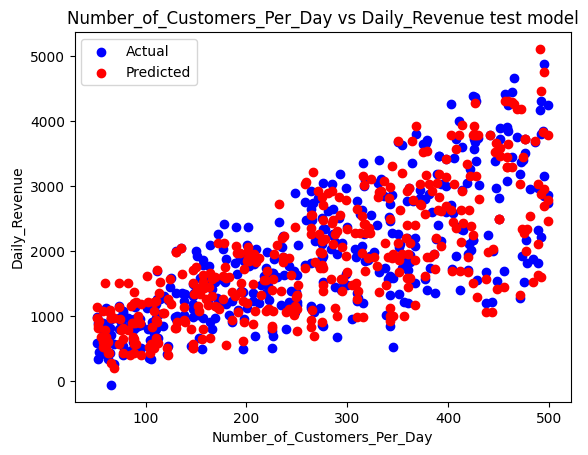

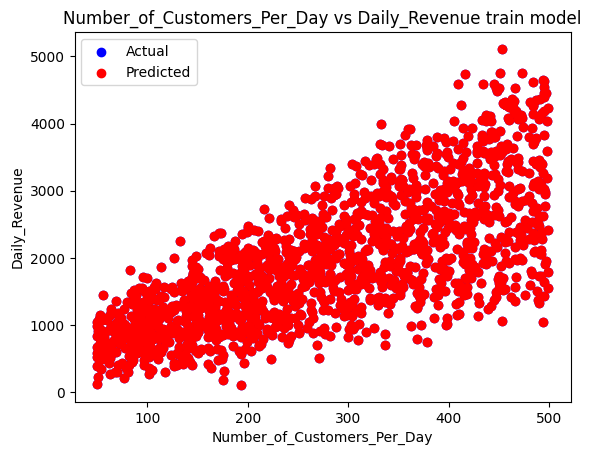

In [ ]:
x = df.drop(columns=['Daily_Revenue']).to_numpy()
# x = df.drop(columns=['quality']),to_numpy() # set the x values as all except quality
y=df[['Daily_Revenue']].to_numpy()

split=int(0.8*len(df)) # find a 80% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("train model score: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("test model score: ",model.score(x_test,y_test))

#plt.scatter(x_train[:,0],x_train[:,1],alpha=0.2,c=y_pred_train,cmap='jet')
#plt.show()
#plt.scatter(x_test[:,0],x_test[:,1],alpha=0.2,c=y_pred_test,cmap='jet')
#plt.show()

plt.scatter(x_test[:,0],y_test,color='blue')
plt.scatter(x_test[:,0],y_pred_test,color='red')
plt.title("Number_of_Customers_Per_Day vs Daily_Revenue test model")
plt.xlabel("Number_of_Customers_Per_Day")
plt.ylabel("Daily_Revenue")
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_train[:,0],y_train,color='blue')
plt.scatter(x_train[:,0],y_pred_train,color='red')
plt.title("Number_of_Customers_Per_Day vs Daily_Revenue train model")
plt.xlabel("Number_of_Customers_Per_Day")
plt.ylabel("Daily_Revenue")
plt.legend(['Actual','Predicted'])
plt.show()

Compared to Linear Regression charts, DecisionTree Regressor charts are better.
The model is more visually appealing as the points are more widely distributed.

The model shows that there is more links between the number of customers and revenue, leads to a higher model score.

# Random Forest

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score:  0.9923321487004412
Test model score:  0.9520623298345208
0.9520623298345208
0.9923321487004412
1.0
1.0


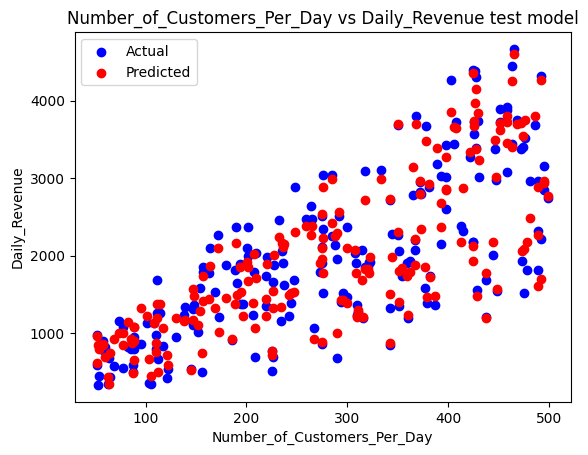

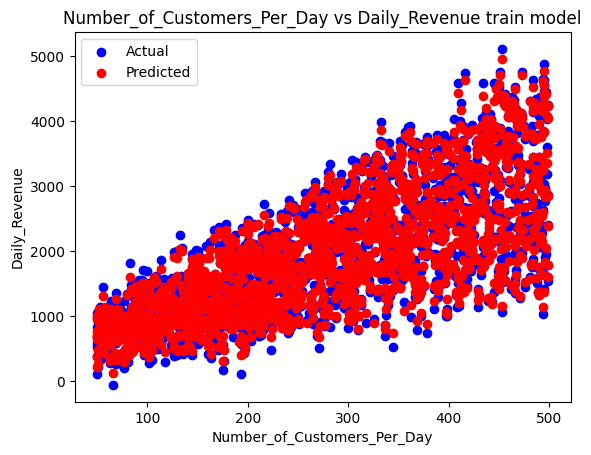

In [ ]:
#x = df.drop(columns=['Daily_Revenue']).to_numpy()
x = df[['Number_of_Customers_Per_Day','Average_Order_Value','Marketing_Spend_Per_Day']].to_numpy() # set the x values
# x = df.drop(columns=['quality']),to_numpy() # set the x values as all except quality
y=df[['Daily_Revenue']].to_numpy()

split=int(0.9*len(df)) # find a 80% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score: ",model.score(x_test,y_test))

print(model.score(x_test,y_test))
print(model.score(x_train,y_train))
print(model.score(x_test,y_pred_test))
print(model.score(x_train,y_pred_train))



#plt.scatter(x_train[:,0],x_train[:,1],alpha=0.2,c=y_pred_train,cmap='jet')
#plt.show()
#plt.scatter(x_test[:,0],x_test[:,1],alpha=0.2,c=y_pred_test,cmap='jet')
#plt.show()

plt.scatter(x_test[:,0],y_test,color='blue')
plt.scatter(x_test[:,0],y_pred_test,color='red')
plt.title("Number_of_Customers_Per_Day vs Daily_Revenue test model")
plt.xlabel("Number_of_Customers_Per_Day")
plt.ylabel("Daily_Revenue")
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_train[:,0],y_train,color='blue')
plt.scatter(x_train[:,0],y_pred_train,color='red')
plt.title("Number_of_Customers_Per_Day vs Daily_Revenue train model")
plt.xlabel("Number_of_Customers_Per_Day")
plt.ylabel("Daily_Revenue")
plt.legend(['Actual','Predicted'])
plt.show()

# Compare different Random Forest split

In [ ]:
split=int(0.7*len(df)) # find a 90% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 90%
y_train=y[:split] # split data to create training set from start of data to 90%
x_test=x[split:]  # split data to create test set from 90% to end of data
y_test=y[split:]  # split data to create test set from 90% to end of data

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42) #default estimators = 100
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score 70: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score 30: ",model.score(x_test,y_test))

split=int(0.8*len(df)) # find a 90% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 90%
y_train=y[:split] # split data to create training set from start of data to 90%
x_test=x[split:]  # split data to create test set from 90% to end of data
y_test=y[split:]  # split data to create test set from 90% to end of data

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42) #default estimators = 100
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score 80: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score 20: ",model.score(x_test,y_test))

split=int(0.9*len(df)) # find a 90% value so we can use to split data into Train & Test
x_train=x[:split] # split data to create training set from start of data to 90%
y_train=y[:split] # split data to create training set from start of data to 90%
x_test=x[split:]  # split data to create test set from 90% to end of data
y_test=y[split:]  # split data to create test set from 90% to end of data

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42) #default estimators = 100
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print("Train model score 90: ",model.score(x_train,y_train))
y_pred_test=model.predict(x_test)
print("Test model score 10: ",model.score(x_test,y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score 70:  0.9919398249050864
Test model score 30:  0.951656099604437


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score 80:  0.9922383126237387
Test model score 20:  0.9522729474409177


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train model score 90:  0.9923321487004412
Test model score 10:  0.9520623298345208


# Feature Enginnering

In [ ]:
# show average values for the 3 selected features

print("Mean Customer per day : ", df['Number_of_Customers_Per_Day'].mean())
print("Mean Marketing spend per day : ", df['Marketing_Spend_Per_Day'].mean()) #
print("Mean Average order value : ",df['Average_Order_Value'].mean())
print()
# get new increased values
customers = float(input("Enter Customers per day : "))
marketing_spend = float(input("Enter Marketing Spend per day : "))
order_value=float(input("Enter Average Order Value : "))


# we are using the values in model to predict a revenue
predict_Revenue = model.predict(np.array([[customers,order_value, marketing_spend]]))


# we are using the mean spend per order and mean marketing spend to predict a revenue
average_Revenue = model.predict(np.array([[df['Number_of_Customers_Per_Day'].mean(),df['Average_Order_Value'].mean(), df['Marketing_Spend_Per_Day'].mean()]]))



print()
print("Your predicted Revenue is : £ ",round(predict_Revenue[0],2))
print()
print("Your average Revenue is : £ ",round(average_Revenue[0],2))

# print the predicted score stored at position 0 and round to 2 decimal places

Mean Customer per day :  274.296
Mean Marketing spend per day :  252.61415999999997
Mean Average order value :  6.261215

Enter Customers per day : 4
Enter Marketing Spend per day : 44
Enter Average Order Value : 44

Your predicted Revenue is : £  743.68

Your average Revenue is : £  1911.38


So, we could use this to try and get increases in marketing or promotions to increase average spend or entice more customers with a modest outlay on extra marketing that would increase sales revenue

We could generate a few values for marketing and chart these to show the customer the effects it has on revenue
We could also recommend ask about current promotions or suggest some


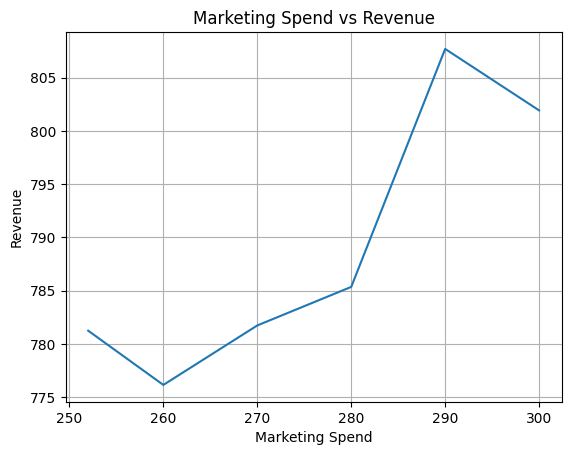

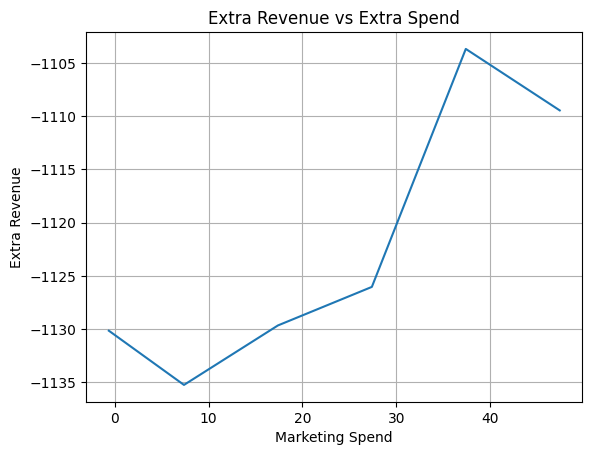

In [ ]:

# set some values for marketing spending in a list
marketing_values=[252,260,270,280,290,300]
# create a list to store the revenues generated
revenue_values=[]
extra_spend=[] # store the values for any extra spend44
4

extra_revenue=[] # store the values for any extra revenue generated

for x in marketing_values: # for each of the values in the marketing list
  predict_Revenue = model.predict(np.array([[customers,order_value, x]]))
  # predict the revenue
  revenue_values.append(predict_Revenue[0])
  # append the value to teh end of the list
  extra_spend.append(x-df['Marketing_Spend_Per_Day'].mean())
  # append the value to teh end of the list
  extra_revenue.append(predict_Revenue[0]-average_Revenue[0])
  # append the value to teh end of the list


plt.plot(marketing_values,revenue_values) # plot the values
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.title('Marketing Spend vs Revenue')
plt.grid()
plt.show()

plt.plot(extra_spend,extra_revenue) # plot the values
plt.xlabel('Marketing Spend')
plt.ylabel('Extra Revenue')
plt.title('Extra Revenue vs Extra Spend')
plt.grid()
plt.show()
